LAB 06 03/10/2024

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv2

    Image gradients

    Sobel filter

Ex. 2.7   

- Read the image “Halep.jpg” as grayscale.  

- Use the Sobel function to compute the X and Y gradients. Set the depth of the output images to CV_32F since the gradients can take negative values. 

- Use the function cv2.normalize to normalize the gradients, so that all pixel values lie between 0 and 1. 

- Display both gradient images. Can they be used as edge detectors?

(np.float64(-0.5), np.float64(688.5), np.float64(944.5), np.float64(-0.5))

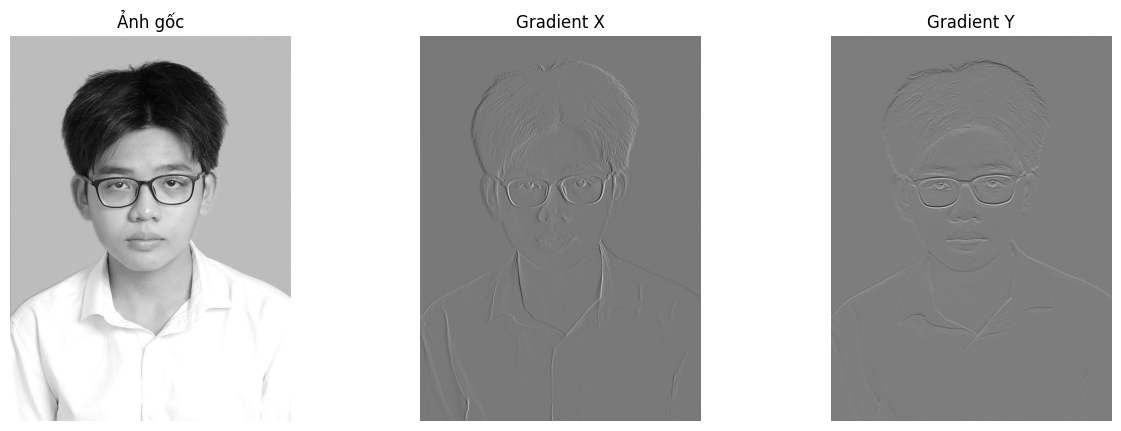

In [12]:
# Đọc ảnh ở chế độ grayscale
image_path = 'C:\\Users\\Trung Tin\\Tài liệu\\IUH\\Xử lý ảnh\\Labs\\Pictures\\image.jpg'
image = plt.imread(image_path)
if image is None:
    print("Hình ảnh không đọc được. Vui lòng kiểm tra lại đường dẫn.")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Tính gradient theo trục X và Y với Sobel
grad_x = cv2.Sobel(image, cv2.CV_32F, 1, 0, ksize=3)
grad_y = cv2.Sobel(image, cv2.CV_32F, 0, 1, ksize=3)

# Chuẩn hóa gradient
grad_x_norm = cv2.normalize(grad_x, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
grad_y_norm = cv2.normalize(grad_y, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

# Hiển thị kết quả
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.title("Ảnh gốc")
plt.axis('off')

plt.subplot(132)
plt.imshow(grad_x_norm, cmap='gray')
plt.title("Gradient X")
plt.axis('off')
plt.subplot(133)
plt.imshow(grad_y_norm, cmap='gray')
plt.title("Gradient Y")
plt.axis('off')

Nhận xét:

Gradient theo X và Y làm nổi bật các cạnh dọc và ngang tương ứng.

Có thể sử dụng để phát hiện cạnh, nhưng cần kết hợp cả hai gradient để có thông tin đầy đủ.

    Laplacian filter 

Ex. 2.8   
- Read the image “Hummingbird.jpg” as grayscale. 
- Apply gaussian blurring using cv2.GaussianBlur for a kernel size of 3x3 pixels. - Apply Laplacian filtering on the previous blurred image. The depth of the output image should be set to CV_32F since gradients can take negative values! 
- Use the function cv2.normalize to normalize the gradients, so that all pixel values lie between 0 and 1. 
- Display the final normalized image! What are the advantages of a Laplacian edge detector compared to Sobel filters? 
- Try also the Laplacian filtering without the Gaussian smoothing. Compare both filtered images! 

(np.float64(-0.5), np.float64(688.5), np.float64(944.5), np.float64(-0.5))

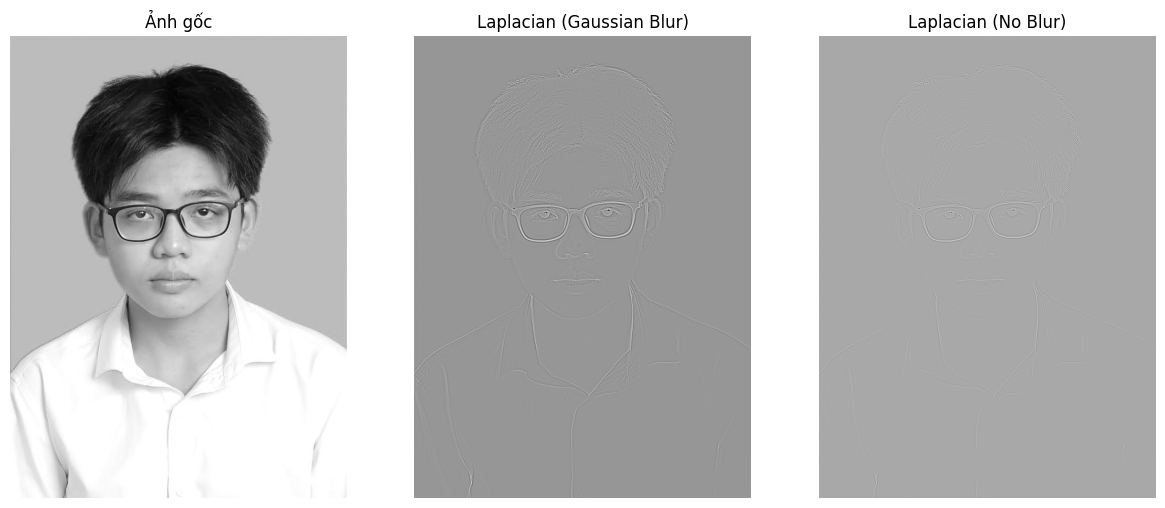

In [14]:
# Làm mờ bằng Gaussian Blur
blurred = cv2.GaussianBlur(image, (3, 3), 0)

# Áp dụng Laplacian filter
laplacian = cv2.Laplacian(blurred, cv2.CV_32F)
laplacian_norm = cv2.normalize(laplacian, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

# Áp dụng Laplacian mà không làm mờ
laplacian_no_blur = cv2.Laplacian(image, cv2.CV_32F)
laplacian_no_blur_norm = cv2.normalize(laplacian_no_blur, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

# Hiển thị kết quả
plt.figure(figsize=(20, 10))

plt.subplot(141)
plt.imshow(image, cmap='gray')
plt.title("Ảnh gốc")
plt.axis('off')

plt.subplot(142)
plt.imshow(laplacian_norm, cmap='gray')
plt.title("Laplacian (Gaussian Blur)")
plt.axis('off')

plt.subplot(143)
plt.imshow(laplacian_no_blur_norm, cmap='gray')
plt.title("Laplacian (No Blur)")
plt.axis('off')

Nhận xét:

Laplacian rất nhạy cảm với nhiễu; làm mờ trước khi áp dụng Laplacian giúp giảm nhiễu hiệu quả.

Ưu điểm: Đơn giản, phát hiện cạnh sắc nét hơn Sobel.

Hạn chế: Không phân biệt được hướng cạnh như Sobel.

    Image sharpening  

Ex. 2.9 What are the texture components highlighted by the sharpening effect? Experiment also with other images (parrots.jpg). Describe the type of texture that is more prominent after the sharpen filtering. 

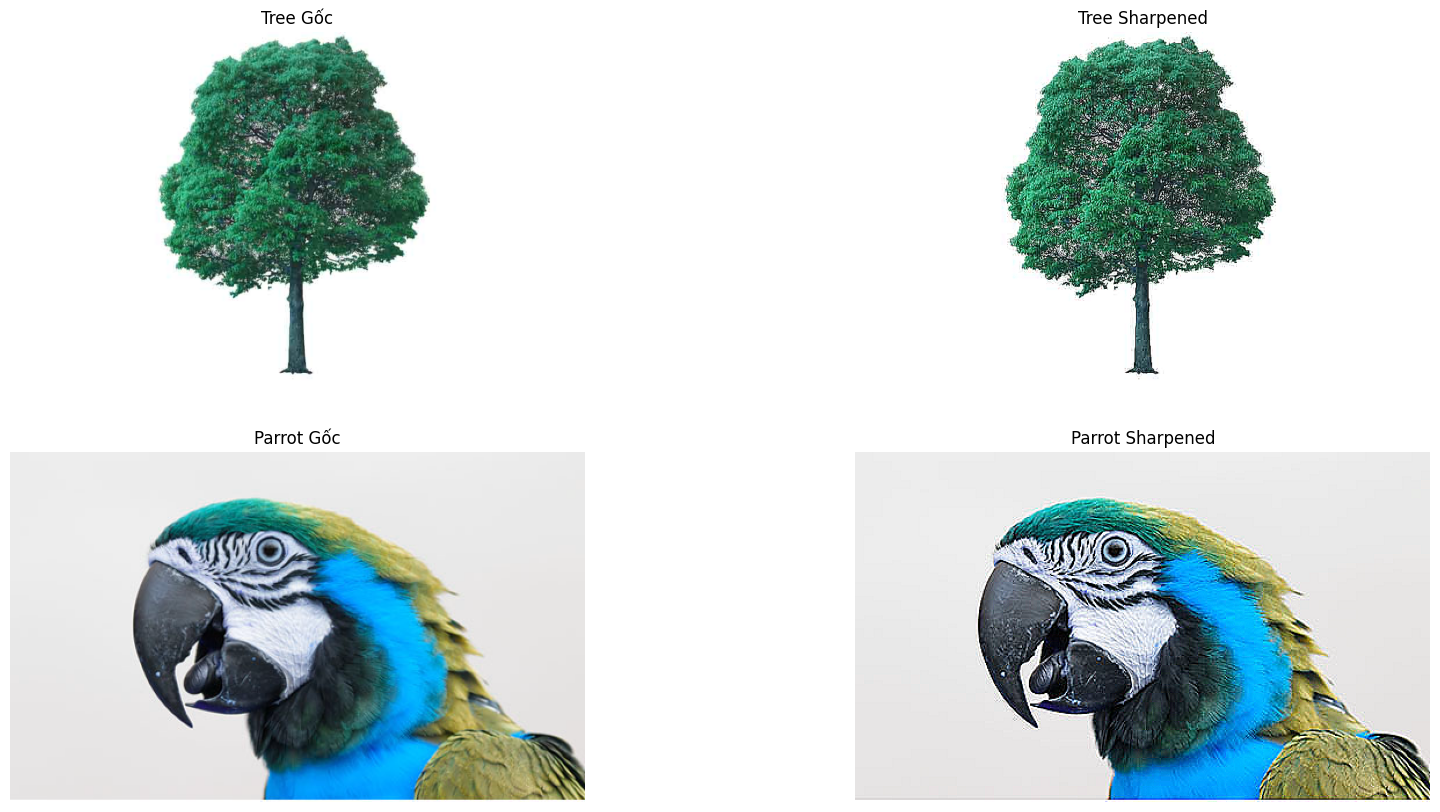

In [19]:
# Đọc ảnh
image_path = 'C:\\Users\\Trung Tin\\Tài liệu\\IUH\\Xử lý ảnh\\Labs\\Pictures\\tree.jpg'
image_tree = plt.imread(image_path)
image_path = 'C:\\Users\\Trung Tin\\Tài liệu\\IUH\\Xử lý ảnh\\Labs\\Pictures\\parrot.jpg'
image_parrot = plt.imread(image_path)

# Kernel sharpening
sharpen_kernel = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])

# Áp dụng bộ lọc sharpening
sharpen_tree = cv2.filter2D(image_tree, -1, sharpen_kernel)
sharpen_parrots = cv2.filter2D(image_parrot, -1, sharpen_kernel)

# Hiển thị kết quả
plt.figure(figsize=(20, 10))
plt.subplot(221); plt.imshow(cv2.cvtColor(image_tree, cv2.COLOR_BGR2RGB)); plt.title("Tree Gốc"); plt.axis('off')
plt.subplot(222); plt.imshow(cv2.cvtColor(sharpen_tree, cv2.COLOR_BGR2RGB)); plt.title("Tree Sharpened"); plt.axis('off')
plt.subplot(223); plt.imshow(cv2.cvtColor(image_parrot, cv2.COLOR_BGR2RGB)); plt.title("Parrot Gốc"); plt.axis('off')
plt.subplot(224); plt.imshow(cv2.cvtColor(sharpen_parrots, cv2.COLOR_BGR2RGB)); plt.title("Parrot Sharpened"); plt.axis('off')
plt.show()

Nhận xét:

tree.jpg: Làm nổi bật cấu trúc vỏ cây và lá nhỏ.

parrot.jpg: Làm nổi bật chi tiết lông vũ và viền của các con vẹt.

Kết luận: Bộ lọc này tăng độ tương phản tại các cạnh và làm rõ texture nhỏ trong ảnh.